# Wahlergebnisse
Wienwahl-Ergebnisse 2020 (Wahlbeteiligung 65.27%): SPÖ 41.62%, ÖVP 20.43%, Grüne 14.8%, NEOS 7.47%, FPÖ 7.11%, HC 3.27%, Sonstige 5.29%.

a) Erstellen Sie einen Plot mit 2 Subplots: einem Balkendiagramm und einem Kuchendiagramm zu den Wienwahl-Daten. Die Gruppen sowie Achsen/Titel sollen dabei sinnvoll beschriftet werden und die Farben akkurat gewählt werden (diese können in einem Vektor übergeben werden, `color = [...]` für das Balkendiagramm, `colors = [...]` für das Kuchendiagramm). Beim Kuchendiagramm soll 'Sonstige' abgespaltet dargestellt werden.

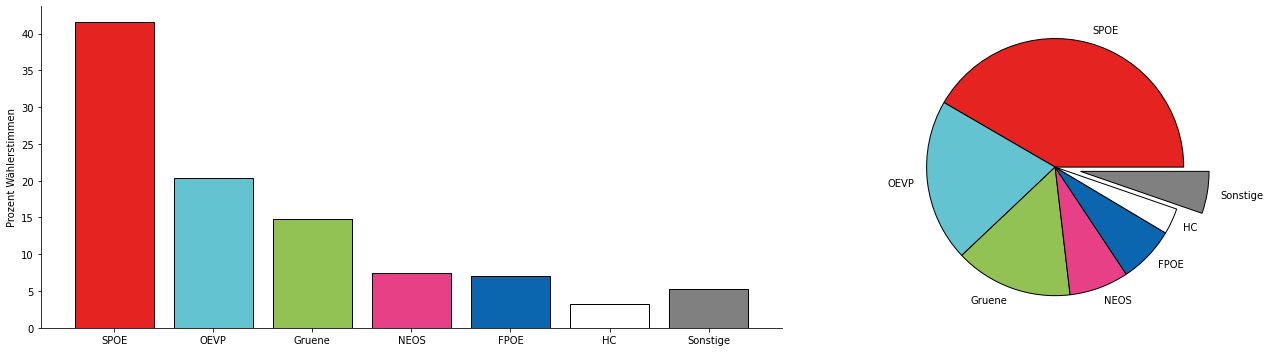

In [1]:
import matplotlib.pyplot as plt

parties = ['SPOE', 'OEVP', 'Gruene', 'NEOS', 'FPOE', 'HC', 'Sonstige']
data = {
    'SPOE': 41.62,
    'OEVP': 20.43,
    'Gruene': 14.80,
    'NEOS': 7.47,
    'FPOE': 7.11,
    'HC': 3.27,
    'Sonstige': 5.29
}
colors = {
    'SPOE': '#E52320',
    'OEVP': '#63C3D0',
    'Gruene': '#92C254',
    'NEOS': '#E74087',
    'FPOE': '#0C65AF',
    'HC': 'white',
    'Sonstige': 'grey'
}

fig, (barax, pieax) = plt.subplots(1, 2)
barax.bar(
    x = range(len(data)),
    height = [data[party] for party in parties],
    align = 'center',
    color = [colors[party] for party in parties],
    edgecolor = 'k',
    tick_label = parties
)
barax.set_ylabel('Prozent Wählerstimmen')

for pos in ['top', 'right']:
    barax.spines[pos].set_visible(False)
    
pieax.pie(
    x = [data[party] for party in parties],
    explode = [0 for party in parties[:-1]] + [0.2],
    colors = [colors[party] for party in parties],
    labels = parties,
    wedgeprops = {'edgecolor': 'k'}
)

fig.set_figwidth(20)
fig.set_figheight(5)
fig.tight_layout()

b) Berechnen Sie wie das Wahlergebnis aussehen würde, wenn ein Zehntel der Nichtwähler*innen eine Kleinpartei aus 'Sonstige' gewählt hätte. Stellen Sie dies nun wieder mit einem Kuchendiagramm dar. Diesmal sollen auch die Prozentzahlen der Teile angegeben sein. Geben Sie nochmals das Kuchendiagramm aus a) aus und vergleichen/interpretieren Sie die Ergebnisse der anderen Parteien.

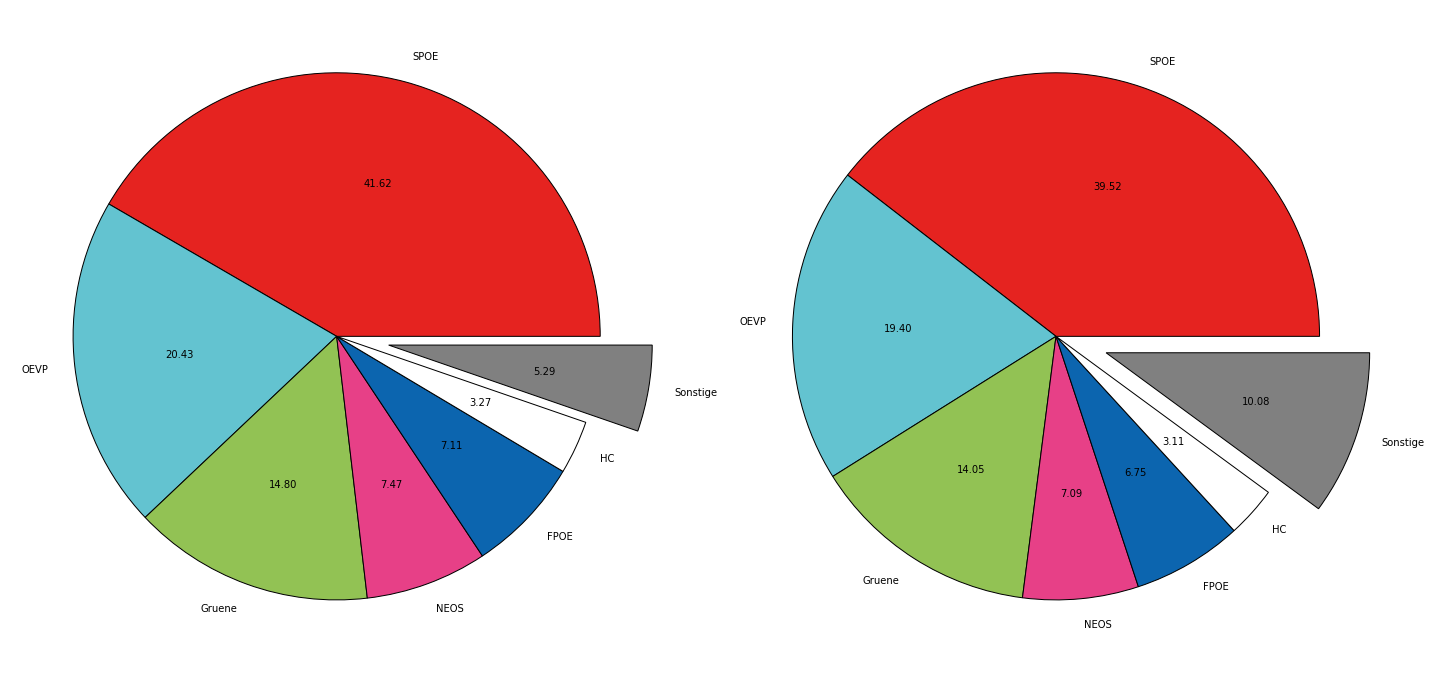

In [2]:
population = 1e6
participation = 0.6527
voters = population * participation
nonvoters = population - voters
absolute_data = {k: v / 100 * voters for k, v in data.items()}
absolute_data['Sonstige'] += nonvoters * 0.1
new_data = {k: v/sum(absolute_data.values()) * 100 for k, v in absolute_data.items()}

fig, axs = plt.subplots(1, 2)
for ax, dat in zip(axs, [data, new_data]):
    ax.pie(
        x = [dat[party] for party in parties],
        explode = [0 for party in parties[:-1]] + [0.2],
        colors = [colors[party] for party in parties],
        labels = parties,
        autopct = '%.2f%%',
        wedgeprops = {'edgecolor': 'k'}
    )
    
fig.set_figwidth(20)
fig.set_figheight(10)
fig.tight_layout()

# Funktionswerte
Berechnen Sie die Funktionswerte von

$$
f(x) = x^2*\sin(x)*\cos(x)^3
$$

im Intervall [−2,2) für jeweils 5,10,15 und 100 äquidistante x-Werte. Erstellen Sie für jede Anzahl der x-Werte einen Subplot, wobei die Funktionswerte jeweils durch Punkte, die linear verbunden sind, dargestellt werden sollen. Jeder Subplot soll sich weiters durch unterschiedliche Symbole der Punkte und Farben unterscheiden. Geben Sie den gesamten Plot (mit den 4 Subplots) aus.

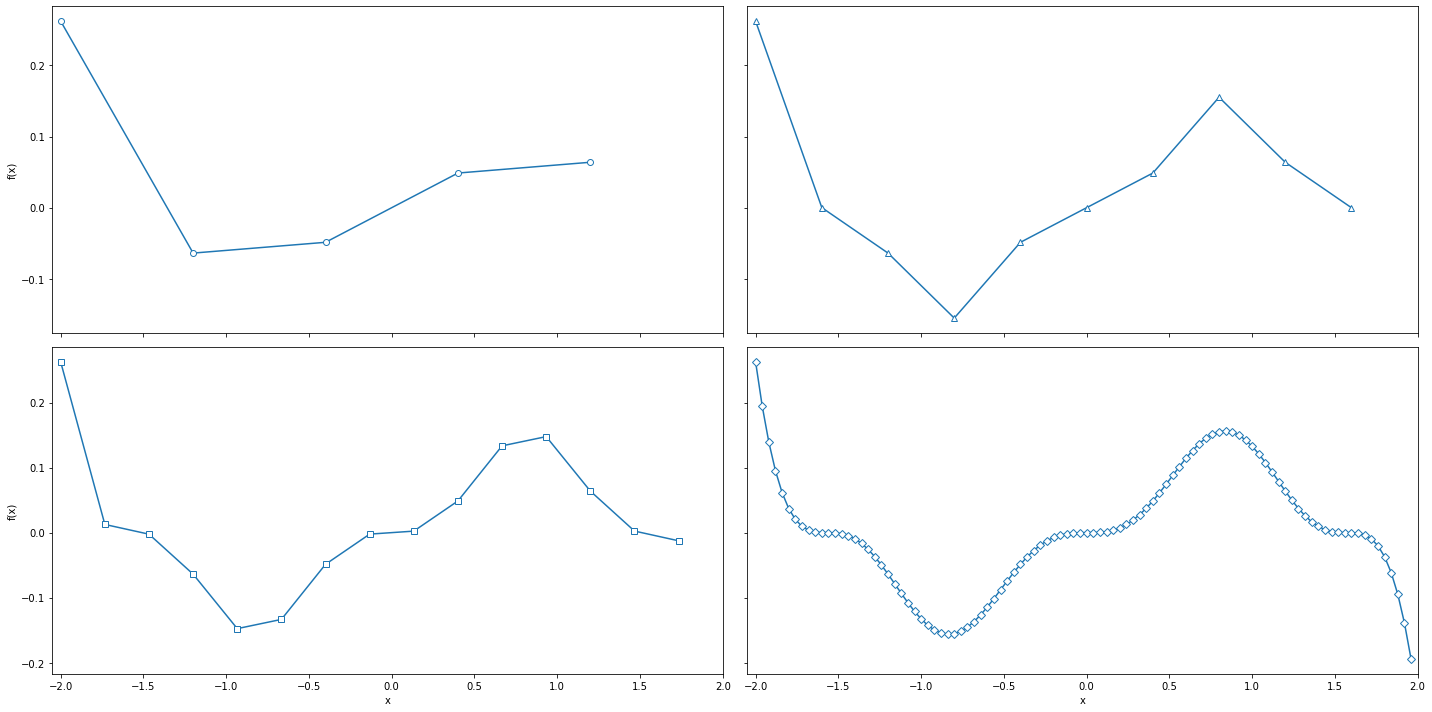

In [3]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x: x*x*np.sin(x)*np.cos(x)**3
fig, axs = plt.subplots(2, 2, sharex = 'col', sharey = 'row')
for n, marker, ax in zip(
    [5, 10, 15, 100], 
    ['o', '^', 's', 'D'],
    axs.reshape(4)
):
    x = np.arange(-2, 2, step = 4 / n)
    ax.plot(
        x, f(x),
        marker = marker,
        markerfacecolor = 'white'
    )
    ax.set_xlim(-2.05, 2)

axs[0, 0].set_ylabel('f(x)')
axs[1, 0].set_ylabel('f(x)')
axs[1, 0].set_xlabel('x')
axs[1, 1].set_xlabel('x')
fig.set_figwidth(20)
fig.set_figheight(10)
fig.tight_layout()

# Histogramme
Plotten Sie Histogramme für $N=10^3,\ldots,10^6$ zufällige Punkte in einem Plot mit je 2 Subplots: Diese sollen 1) standard normalverteilt und 2) gleichverteilt sein. Die Anzahl der bins soll dabei sinnvoll in Abhängigkeit von $N$ gewählt werden. 

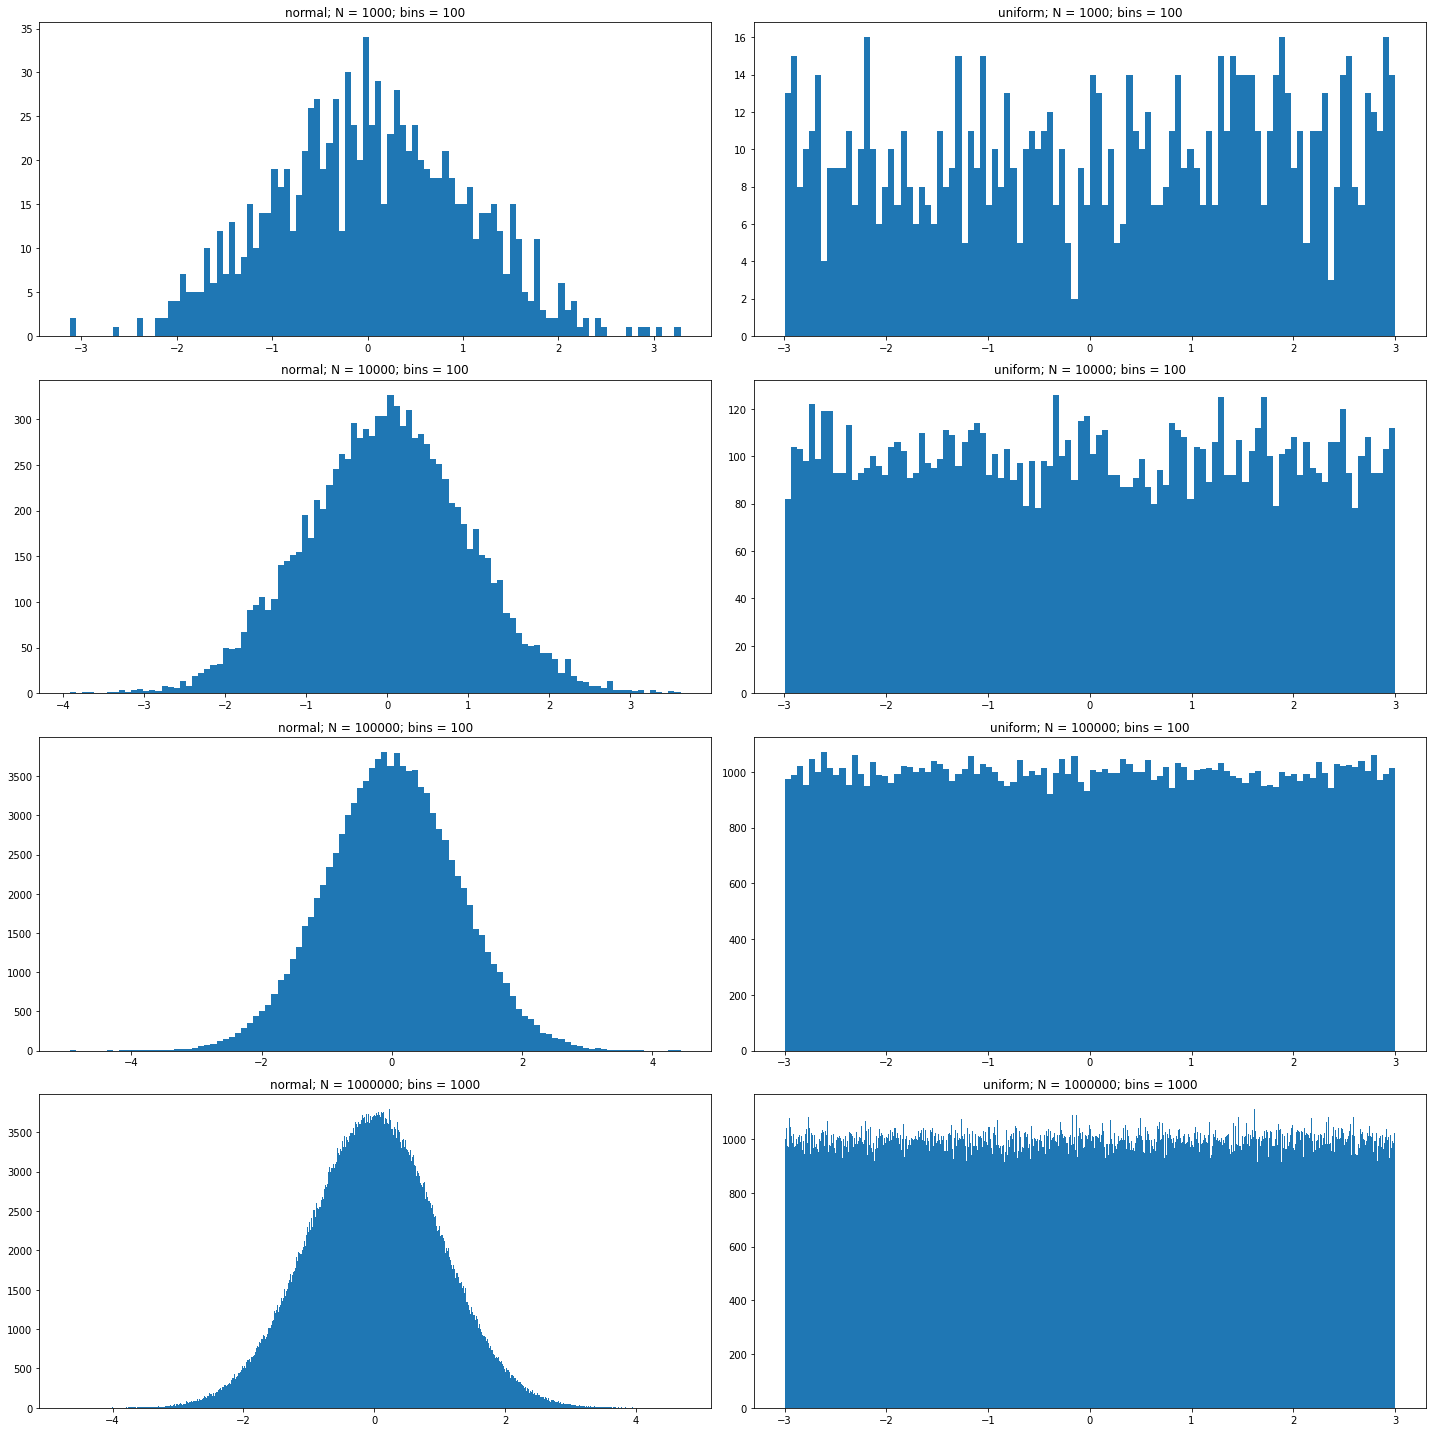

In [4]:
import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, 2)
normal = lambda n: np.random.normal(size = n)
uniform = lambda n: np.random.uniform(low = -3, high = 3, size = n)
for n, rowaxs in zip(np.logspace(3, 6, 4), axs):
    for ax, randomfunc, title in zip(
        rowaxs, 
        [normal, uniform], 
        ['normal', 'uniform']
    ):
        bins = max(100, int(0.001 * n))
        ax.hist(
            randomfunc(int(n)),
            bins = bins
        )
        ax.set_title(title + f'; N = {int(n)}; bins = {bins}')

fig.set_figheight(20)
fig.set_figwidth(20)
fig.tight_layout()

# Eulerfunktion
Stellen Sie $e^{c*x}$ für $c=1,2,3,4$ und $x \in [0.1,10)$ in einem Plot mit logarithmischer y-Achsen Skalierung dar. Die Graphen sollen für jedes $c$ eine Legende haben und der Plot einen Titel. Implementieren Sie dann analog die Darstellung von $c*x$ ohne Achsenskalierung. Erklären Sie warum die Plots gleich aussehen.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def plot_function(func, c, title, logy = False):
    x = np.arange(0.1, 10, step = 0.1)
    fig, ax = plt.subplots()
    for c_i in c:
        ax.plot(
            func(x * c_i),
            label = f'c = {c_i}'
        )
        if logy:
            ax.set_yscale('log')
            
    ax.legend()
    ax.set_title(title)
    
    fig.set_figheight(5)
    fig.set_figwidth(10)
    fig.tight_layout()
    return fig, ax

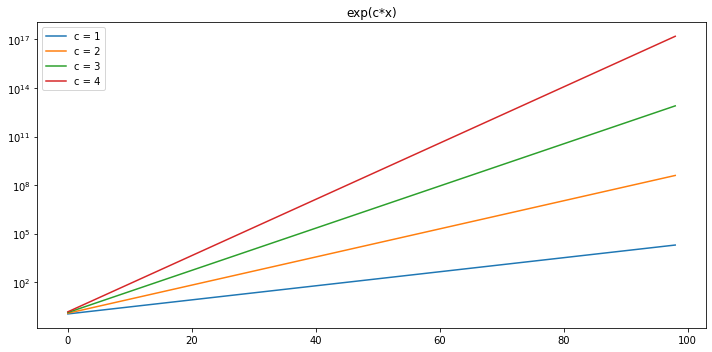

In [6]:
fig, ax = plot_function(
    np.exp, 
    np.arange(1, 5, step = 1),
    'exp(c*x)',
    logy = True
)

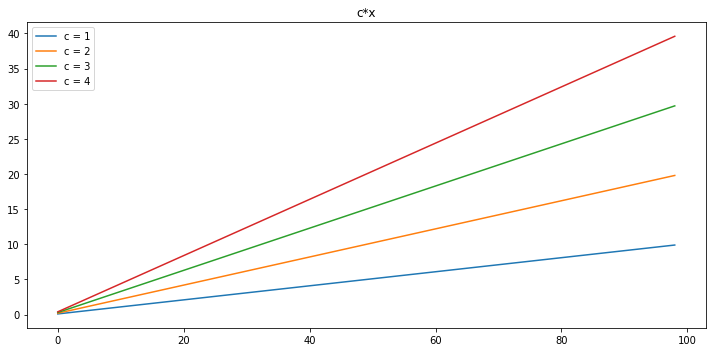

In [7]:
fig, ax = plot_function(
    lambda x: x, 
    np.arange(1, 5, step = 1),
    'c*x',
    logy = False
)

# Funktionswerte mit `sympy` und `numpy`
Plotten Sie die Funktion

$$
f(x)=\cos(x)*\sin(x)
$$

für $x \in [−5,5]$ einmal mittels der Routinen im Modul `sympy` und einmal mittels `numpy` und `matplotlib`.

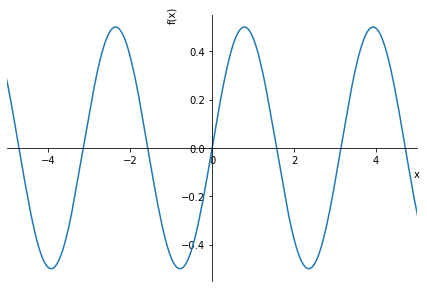

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sympy.functions import cos, sin
from sympy.abc import x
from sympy import plot

p = plot(
    cos(x)*sin(x),
    xlim = (-5, 5),
)

(-5.0, 5.0)

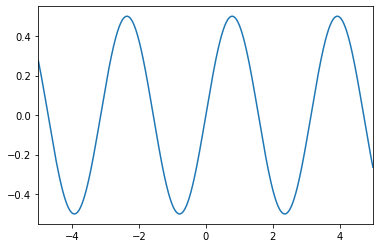

In [9]:
fig, ax = plt.subplots()
x = np.arange(-5, 5, step = 0.01)
ax.plot(
    x, 
    np.cos(x)*np.sin(x)
)
ax.set_xlim(-5, 5)